In [1]:
# import and initialize otter
import otter
grader = otter.Notebook("p4.ipynb")

In [2]:
import public_tests

In [ ]:
# PLEASE FILL IN THE DETAILS
# enter none if you don't have a project partner
# you will have to add your partner as a group member on Gradescope even after you fill this

# project: p4
# submitter: 9086086957
# partner: NETID2
# hours: ????

## Project 4: Pokemon Battle Simulation

### Learning Objectives:

In this project, you will demonstrate how to

* Use conditional statements to implement decisions,
* Write functions using parameters, return values, and conditional logic,
* Use good coding practices as outlined in Lab-P4.

**Please go through [Lab-P4](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/tree/main/lab-p4) before working on this project.** The lab introduces some useful techniques related to this project.

## Testing your code:

Along with this notebook, you must have downloaded the file `public_tests.py`. If you are curious about how we test your code, you can explore this file, and specifically the function `get_expected_json`, to understand the expected answers to the questions.

## Project Description:

For this project, you'll be using the data from `pokemon_stats.csv` and `type_effectiveness_stats.csv` to simulate Pokemon battles and to check the compatibility for friendships between different Pokemon. This data was gathered by the Python program `gen_csv.ipynb` from the website https://www.pokemondb.net/.

* To start, download `project.py`, `public_tests.py`, `type_effectiveness_stats.csv`, and `pokemon_stats.csv`.
* You'll do all your work on this notebook, and turn it into Gradescope just as you did for the previous projects.

We won't explain how to use the project module here (the code in the `project.py` file), or the dataset that you will be working with. The lab this week is designed to teach you how it works. So, before starting P4, take a look at Lab-P4.

## Project Requirements:


You **may not** hardcode any answers in your code. Otherwise, the Gradescope autograder will **deduct** points.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer. So, if you store your answer in a different variable, you will **not get points** for it.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, the Gradescope autograder will **deduct** points from your public score, even if the way you did it produced the correct answer.

#### Required Functions:
- `damage`
- `type_bonus`
- `get_num_types`
- `effective_damage`
- `num_hits`
- `battle`
- `friendship_score`

You are only allowed to use Python commands and concepts that have been taught in the course before the release of P4. In particular, you are **NOT** allowed to use iteration on this project. The Gradescope autograder will **deduct** points if you use these concepts.

In this project, you will have to write several functions and keep adding more details to them according to the instructions. When you are adding more things to your functions, you **must** follow the **Good Coding Style for Functions** described in [Lab-P4](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/tree/main/lab-p4). Therefore, you **must only** keep the latest version of your functions in your notebook file. You can do this by **replacing** your old function definition with the new one after you have confirmed that the new one works.

## Questions and Functions:

Let us start by importing all the modules we will need for this project.

In [46]:
# it is considered a good coding practice to place all import statements at the top of the notebook

# please place all your import statements in this cell if you need to import 
# any more modules for this project
import project
import math
project.__init__()
help(project)

Help on module project:

NAME
    project

FUNCTIONS
    __init__()
        This function loads the data from 'pokemon_stats.csv' and 'type_effectiveness_stats.csv'. This function runs automatically, when the module is imported

    get_attack(pkmn)
        get_attack(pkmn) returns the Attack of the Pokémon with the name 'pkmn'

    get_defense(pkmn)
        get_defense(pkmn) returns the Defense of the Pokémon with the name 'pkmn'

    get_hp(pkmn)
        get_hp(pkmn) returns the HP of the Pokémon with the name 'pkmn'

    get_region(pkmn)
        get_region(pkmn) returns the region of the Pokémon with the name 'pkmn'

    get_sp_atk(pkmn)
        get_sp_atk(pkmn) returns the Special Attack of the Pokémon with the name 'pkmn'

    get_sp_def(pkmn)
        get_sp_def(pkmn) returns the Special Defense of the Pokémon with the name 'pkmn'

    get_speed(pkmn)
        get_speed(pkmn) returns the Speed of the Pokémon with the name 'pkmn'

    get_type1(pkmn)
        get_type1(pkmn) returns 

In the first stage of this project, we will be simulating Pokemon battles. Before we proceed any further, let us take a look at the Pokemon we will be dealing with in this project (let us know what your favorite Pokemon is in a comment):

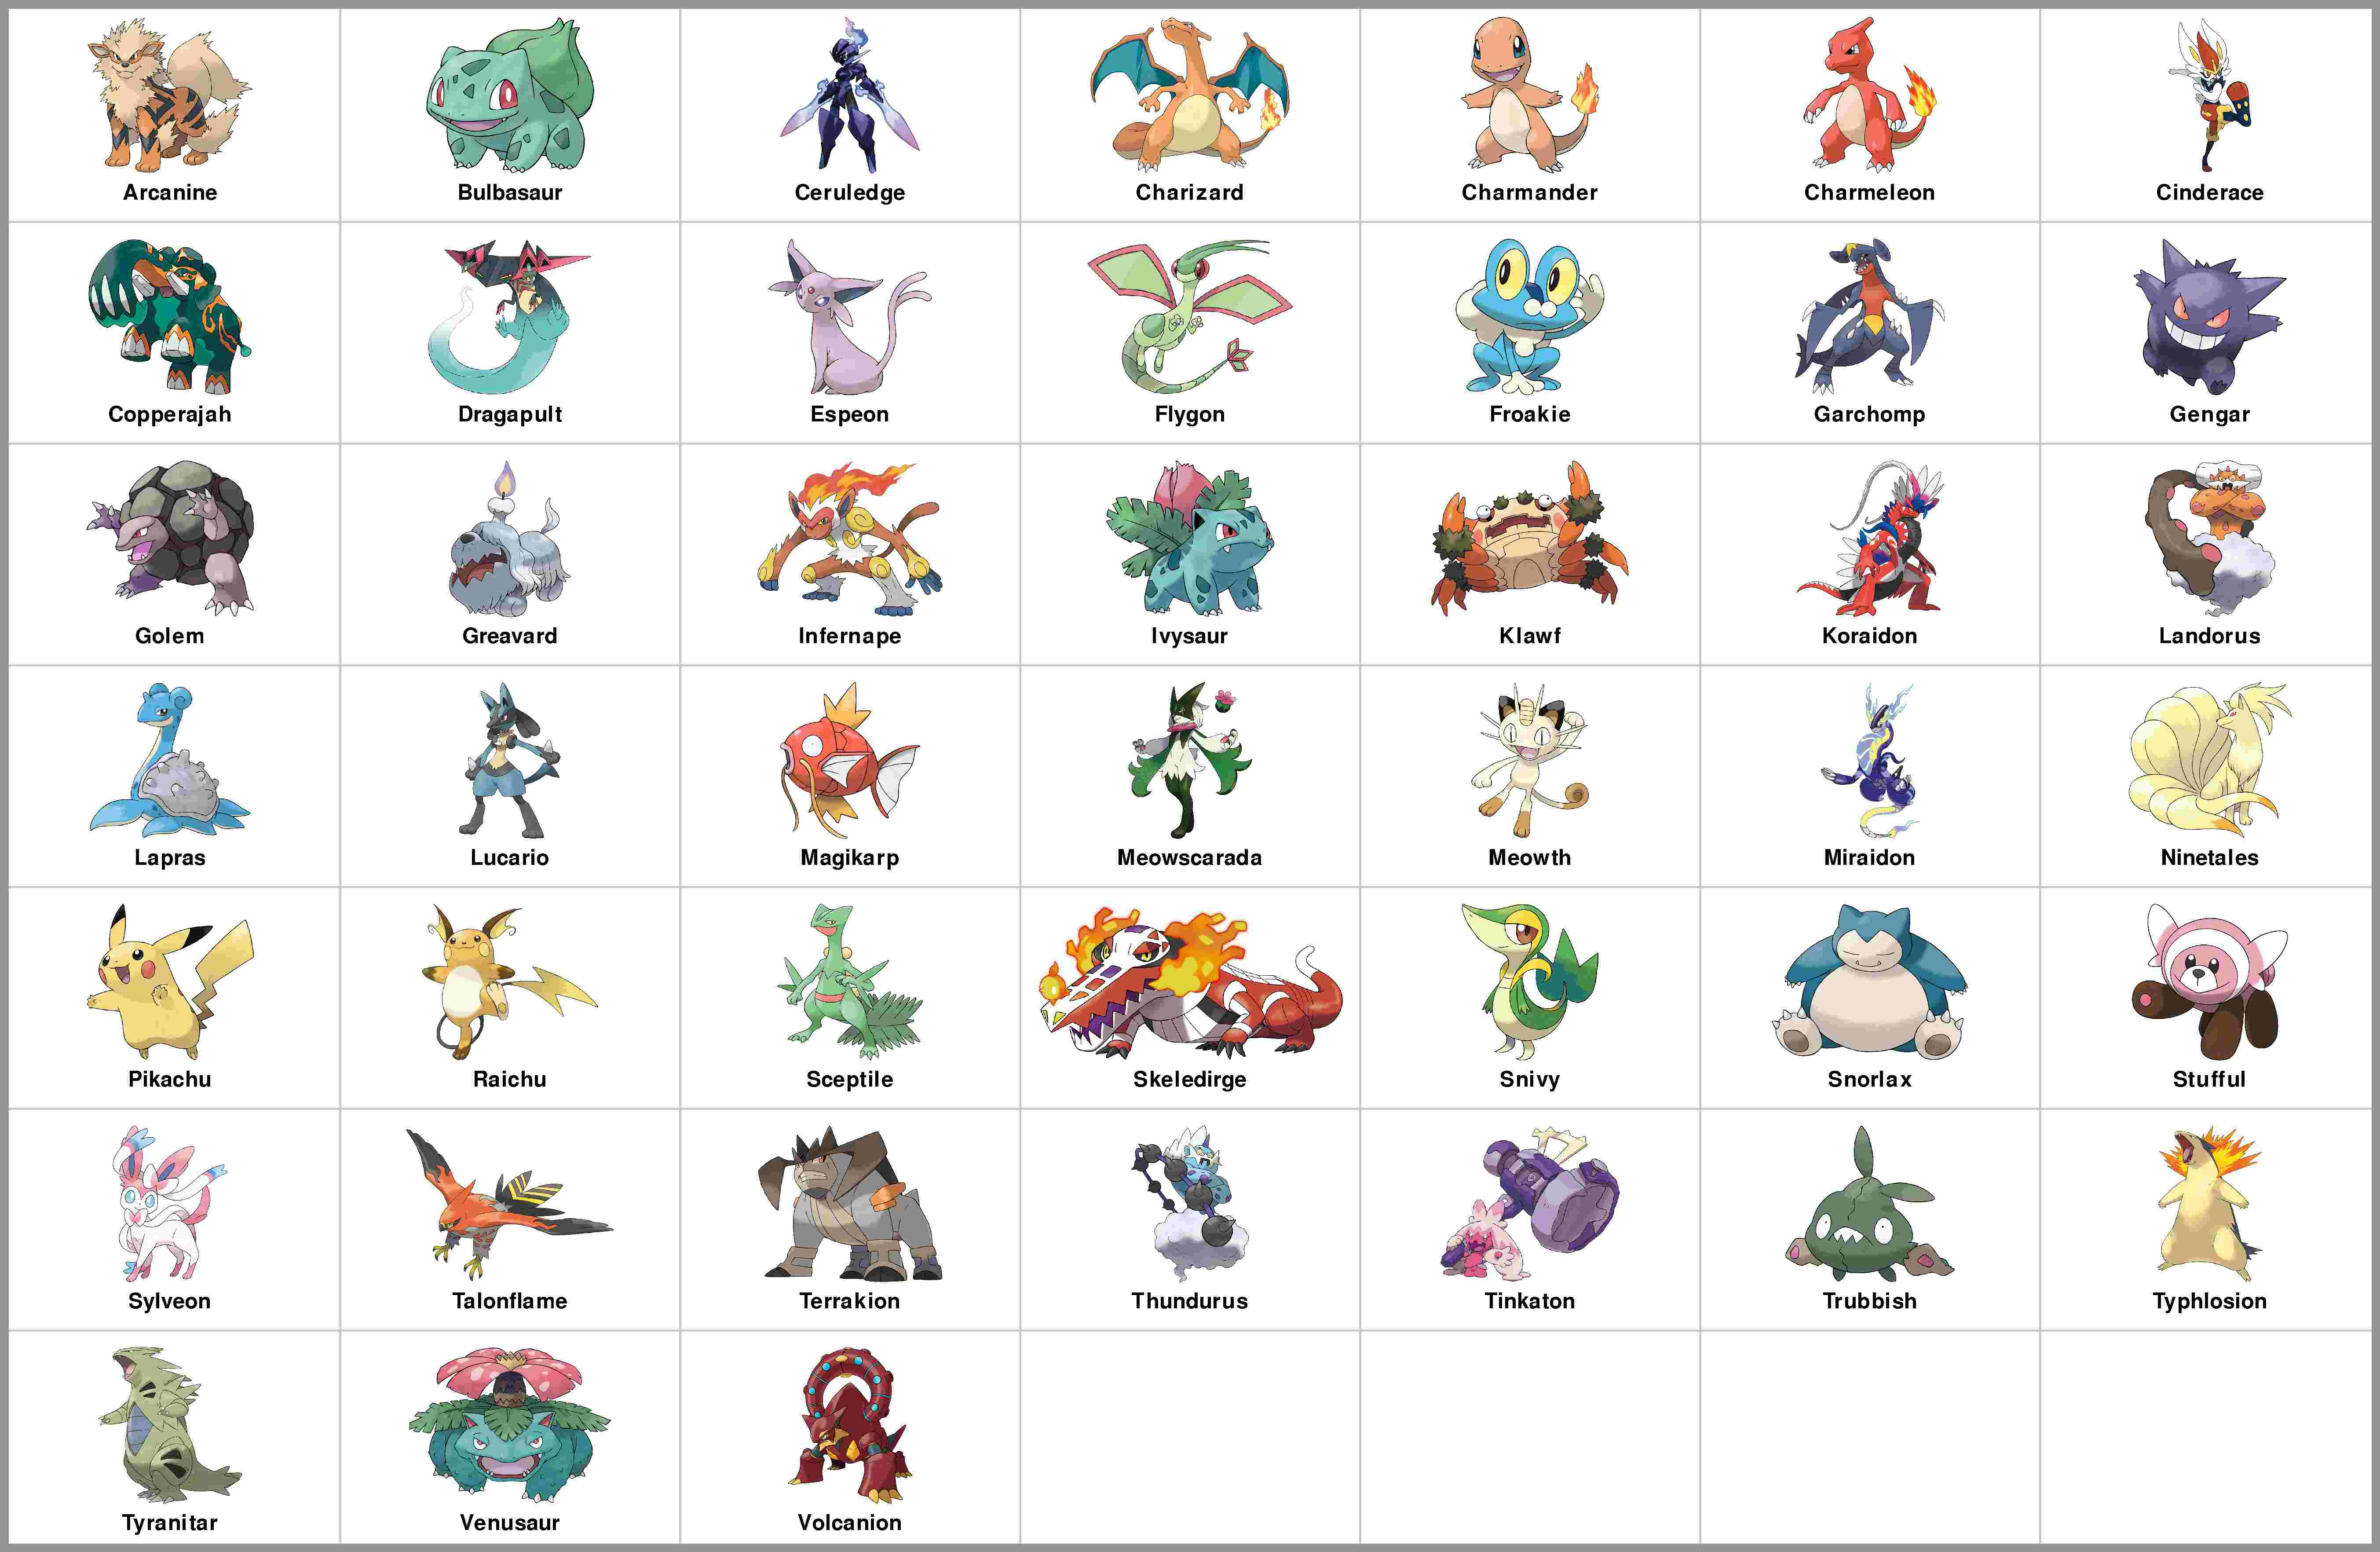

In [ ]:
# Who's your favorite Pokemon? (OPTIONAL) Salamence 


## Rules for Pokemon battles:

Now, here are the *rules* governing Pokemon battles:

1. A Pokemon battle takes place between **two** Pokemon.
2. The two Pokemon **take turns** attacking each other.
3. The Pokemon with the higher **Speed** stat attacks first.
4. On each turn, the attacking Pokemon can choose between two modes of attack - **Physical** or **Special**.
5. In addition to the attack mode, each Pokemon can choose the **type** of its attack.
6. Based on the move chosen by the attacking Pokemon, the defending Pokemon receives damage to its **HP**.
7. If a Pokemon's **HP** drops to (or below) 0, it **faints**.
8. A Pokemon **wins** the battle if its opponent faints first.
9. If both Pokemon faint at the **same time**, or if neither Pokemon is able to damage the other, the battle is a **draw**.

Throughout this project, we will break this down into smaller parts and slowly build up to the `battle` function. Eventually the `battle` function will determine the outcome of a battle between any two Pokemon.

The first thing we need to do is **calculate the damage** caused by one Pokemon's attack on another Pokemon. To accomplish this, we need to create the function `damage`.

### Function 1: `damage(attack, defender)`

The `attacker` can choose between two attack modes - **Physical** or **Special**. The damage caused by the attacker's **Physical** move is `10 * Attack stat of Attacker / Defense stat of Defender`, and the damage caused by the attacker's **Special** move is `10 * Sp. Atk. stat of Attacker / Sp. Def. stat of Defender`.

**If the attacker wants to win, it should always choose the move which will do more damage.** So, that is what we want our function `damage` to do. We want this function to find out which mode of attack the attacker would choose, and return the damage that the attacker would do to the defender.

Use the following code snippet and fill in the details to complete the `damage` function.

In [205]:
def damage(attacker, defender):
    # TODO: replace the ... with your code
    physical_damage = 10 * project.get_attack(attacker) / project.get_defense(defender)
    special_damage = 10 * project.get_sp_atk(attacker) / project.get_sp_def(defender)
    return max(physical_damage, special_damage)


9.8

In [6]:
grader.check("damage")

damage results: All test cases passed!
damage - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the `attacker` needs to choose its physical attack (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
damage - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the `attacker` needs to choose its special attack (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, let's find out if this function works. You **must** use the `damage` function to answer the next two questions.

**Question 1:** How much damage does `Tinkaton` do to `Arcanine`?

In [7]:
# replace the ... with your code
damage_tinkaton_arcanine = damage("Tinkaton", "Arcanine")

damage_tinkaton_arcanine

9.375

In [8]:
grader.check("q1")

q1 results: All test cases passed!
q1 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `damage` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 2:** How much damage does `Lucario` do to `Klawf`?

In [9]:
# replace the ... with your code
damage_lucario_klawf = damage("Lucario", "Klawf")

damage_lucario_klawf

20.90909090909091

In [10]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `damage` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In addition to choosing the attack **mode** (i.e. **Physical** or **Special**), the attacker can also (sometimes) choose the **type** of attack. Before we figure out what type the attacker should choose, we first need to find out the *effect* of the attack on the defender. Each attack type offers a **type bonus** to the attack damage that we calculated with the `damage` function.

If the attacker chooses an attack of type `attack_type` against a defender with only one type, `type1` (i.e. its `type2` is `DNE`), then the **type bonus** of this attack is `get_type_effectiveness(attack_type, type1)`. If the defender has two types `type1` and `type2`, then the **type bonus** of this attack is `get_type_effectiveness(attack_type, type1) * get_type_effectiveness(attack_type, type2)`.

For example, let the `attack_type` be `Bug` and the defender be the Pokemon `Charmander`. `Charmander` has only one type, `Fire` (with its `type2` being `DNE`). In this case, we see that

In [11]:
# the effectiveness of Bug against Fire is...
project.get_type_effectiveness("Bug", "Fire")

0.5

Therefore, the type bonus of a `Fire` type attack on `Charmander` is `0.5`. On the other hand, consider a `Fire` type attack on the Pokemon `Bulbasaur`. `Bulbasaur` has 2 types, `Grass` and `Poison`. In this case, we see that

In [12]:
# the effectiveness of Fire against Grass is...
project.get_type_effectiveness("Fire", "Grass")

2.0

In [13]:
# the effectiveness of Fire against Poison is...
project.get_type_effectiveness("Fire", "Poison")

1.0

Therefore, the type bonus of a `Fire` type attack on `Bulbasaur` is the product of these two numbers `2.0 * 1.0 = 2.0`.

### Function 2: `type_bonus(attack_type, defender)`
We are now ready to write the definition of the `type_bonus` function, which will calculate the type bonus of an `attack_type` against a `defender`. We have provided a code snippet for you to work with. You may rewrite the entire function from scratch if you want to.

In [14]:
def type_bonus(attack_type, defender):
    # TODO: store the `type1` and `type2` of the `defender` in variables 
    #       `defender_type1` and `defender_type2`
    # TODO: replace the ... with your code
    defender_type1 = project.get_type1(defender)
    defender_type2 = project.get_type2(defender)
    if defender_type2 == "DNE":
        bonus = project.get_type_effectiveness(attack_type, defender_type1)
        return bonus
    else:
        bonus = project.get_type_effectiveness(attack_type, defender_type1) * project.get_type_effectiveness(attack_type, defender_type2)
        return bonus

In [15]:
grader.check("type_bonus")

type_bonus results: All test cases passed!
type_bonus - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the `defender` has only one type (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
type_bonus - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the `defender` has two types (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

You **must** use the `type_bonus` function to answer the next two questions.

**Question 3:** How effective is `Rock` type against `Talonflame`?

In [16]:
# replace the ... with your code
bonus_rock_talonflame = type_bonus("Rock", "Talonflame")

bonus_rock_talonflame

4.0

In [17]:
grader.check("q3")

q3 results: All test cases passed!
q3 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `type_bonus` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 4:** How effective is `Bug` type against `Ninetales`?

In [20]:
# replace the ... with your code
bonus_bug_ninetales = type_bonus("Bug", "Ninetales")

bonus_bug_ninetales

0.5

In [21]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `type_bonus` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

When an `attacker` chooses an attack of type `attack_type` against a `defender`, the damage done is `type_bonus(attack_type, defender) * damage(attacker, defender)`.

An attacker can choose between any of its types for its attack type. So, if an attacker has two types, it can choose **either** type 1 or type 2 as its attack type. However, if it has only one type (i.e. its `type2` is `DNE`), it has **no choice** but to choose type 1 as its attack type. For example, a Pokemon like `Stufful` which has two types (`Normal` and `Fighting`) can choose to make its attack either `Normal` type or `Fighting` type. On the other hand, a Pokemon like `Magikarp` which has only one type (`Water`) can only make its attack a `Water` type attack.

While a Pokemon with only one type doesn't have a choice, **a Pokemon with two types can choose its attack between its two types**. If the attacker wants to win, it should always choose the type which will do more damage.

Let us consider the case when an **attacker has only one type**. (i.e. `type2` is `DNE`). To illustrate this, we take `Magikarp` as the attacker and `Cinderace` as the defender. Let us first ensure that `Magikarp` has only 1 type.

In [22]:
# type1 of Magikarp is...
project.get_type1("Magikarp")

'Water'

In [23]:
# and type2 of Magikarp is...
project.get_type2("Magikarp")

'DNE'

In this case, we simply take the `type_bonus` of the first type against `Cinderace` (the defender).

In [24]:
# so the bonus that Magikarp gets against Cinderace is...
bonus = type_bonus(project.get_type1("Magikarp"), "Cinderace")

bonus

2.0

If your `type_bonus` function works correctly, `bonus` should have the value `2.0`. To calculate the **effective damage** that Magikarp does to Cinderace, we just have to compute `damage("Magikarp", "Cinderace") * 2.0`

We will now consider the case where an **attacker has two types**.

To illustrate this, we take `Stufful` as the `attacker` and `Lucario` as the `defender`. The type bonus of the two types of `Stufful` against `Cinderace` are as follows:

In [25]:
# the type bonus of type1 (Normal) of Stufful against Lucario is...
bonus_type1 = type_bonus(project.get_type1("Stufful"), "Lucario")

bonus_type1

0.5

In [26]:
# and the type bonus of type2 (Fighting) of Stufful against Lucario is...
bonus_type2 = type_bonus(project.get_type2("Stufful"), "Lucario")

bonus_type2

2.0

If your `type_bonus` function works correctly, then `bonus_type1` should have the value `0.5`, and `bonus_type2` should have the value `2.0`. Clearly, `Stufful`'s second type (`Fighting`) causes more damage to `Lucario` than its first type (`Normal`). So, **`Stufful` would choose its `Fighting` type attack instead of its `Normal` type attack against `Lucario`**.

Therefore, the **effective** `bonus` is `max(0.5, 2.0) = 2.0`. So, the **effective damage** that `Stufful` does to `Lucario` is `damage("Stufful", "Lucario") * 2.0`.

### Function 3: `get_num_types(pkmn)`

You must have already defined the function `get_num_types` in Lab-P4. You will need that function to continue with this project. Copy/paste the definition of `get_num_types` here.

In [27]:
# copy/paste the definition of 'get_num_types' here
def get_num_types(pkmn):
    if project.get_type1(pkmn) == 'DNE':
        return 0
    elif project.get_type2(pkmn) == 'DNE':
        return 1
    else:
        return 2

In [28]:
grader.check("get_num_types")

get_num_types results: All test cases passed!
get_num_types - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function logic is incorrect (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

### Function 4: `effective_damage(attacker, defender)`

We now write a function `effective_damage` to compute the actual damage that an `attacker` would do to the `defender`, taking into account, both the **attack mode** and **attack type**.

The `effective_damage` function definition **must** invoke the `get_num_types` function. The Gradescope autograder will **deduct** points if you do not invoke `get_num_types`.

Start with the code snippet provided below.

In [34]:
def effective_damage(attacker, defender):
    
    if get_num_types(attacker) == 1:
        return damage(attacker, defender) * type_bonus(project.get_type1(attacker), defender)
    else:
        return damage(attacker, defender) * max(type_bonus(project.get_type1(attacker), defender), type_bonus(project.get_type2(attacker), defender))
    #TODO: check if the attacker has two types; you must invoke the relevant 
    #      function you defined in Lab-P4
    #TODO: compute the bonus of the attacker's type(s) against the defender
    #TODO: find the attack_type with the higher bonus
    #TODO: compute the damage caused by attack, considering the higher bonus, and return it
    

In [35]:
grader.check("effective_damage")

effective_damage results: All test cases passed!
effective_damage - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`get_num_types` function is not used by `effective_damage` (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
effective_damage - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the `attacker` has only one type (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
effective_damage - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the `attacker` has two types (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

You **must** use the `effective_damage` function to answer the next three questions.

**Question 5:** How much **effective** damage does `Froakie` do to `Snivy`?

In [36]:
# replace the ... with your code
eff_damage_froakie_snivy = effective_damage("Froakie", "Snivy")

eff_damage_froakie_snivy

5.636363636363637

In [37]:
grader.check("q5")

q5 results: All test cases passed!
q5 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `effective_damage` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 6:** How much **effective** damage does `Gengar` do to `Lapras`?

In [38]:
# replace the ... with your code
eff_damage_gengar_lapras = effective_damage("Gengar", "Lapras")

eff_damage_gengar_lapras

13.68421052631579

In [39]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `effective_damage` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 7:** How much **effective** damage does `Tyranitar` do to `Charizard`?

In [40]:
# replace the ... with your code
eff_damage_tyranitar_charizard = effective_damage("Tyranitar", "Charizard")

eff_damage_tyranitar_charizard

68.71794871794872

In [41]:
grader.check("q7")

q7 results: All test cases passed!
q7 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `effective_damage` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

### Function 5: `num_hits(attacker, defender)`

Now that we have a way of calculating the damage done by the Pokemon during battle, we have to calculate **how many hits** each Pokemon can take before fainting.

The number of hits a Pokemon can take is calculated by taking its **HP** and dividing it by the attacking Pokemon's **effective damage**.

If the defending pokemon has `30 HP` and the attacking pokemon does `20` effective damage each turn, it will take `2` turns before the defender faints instead of `30 / 20 = 1.5`. You might want to use the method `math.ceil` here. First import the module `math` (remember to add the `import math` call at the **top of your notebook** in the cell where you have been asked to place all `import` statements) and then look up the documentation of `math.ceil` to see how you could use it.

In [71]:
def num_hits(attacker, defender):
    if effective_damage(attacker, defender) == 0.0:
        return "infinitely many"
    return math.ceil(project.get_hp(defender) / effective_damage(attacker, defender))

In [72]:
grader.check("num_hits")

num_hits results: All test cases passed!
num_hits - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the `attacker` can do non-zero effective damage to the `defender` (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
num_hits - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the `attacker` cannot do any damage to the `defender` (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

You **must** use `num_hits` to answer the next three questions.

**Question 8:** How many hits can the *defending* Pokemon `Snorlax` take from `Golem`(*attacker*)?

In [73]:
# replace the ... with your code
hits_snorlax_golem = num_hits("Golem", "Snorlax")

hits_snorlax_golem

9

In [74]:
grader.check("q8")

q8 results: All test cases passed!
q8 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `num_hits` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 9:** How many hits can the *defending* Pokemon `Sceptile` take from `Meowscarada`(*attacker*)?

In [75]:
# replace the ... with your code
hits_sceptile_meowscarada = num_hits("Meowscarada", "Sceptile")

hits_sceptile_meowscarada

5

In [76]:
grader.check("q9")

q9 results: All test cases passed!
q9 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `num_hits` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Your `num_hits` function appears to be working well so far. However, there is still a problem with this function.

In [77]:
# the effective damage of Trubbish against Copperajah is...
effective_damage("Trubbish", "Copperajah")

0.0

If your `effective_damage` function works correctly, you would see that the **effective damage** that `Trubbish` can do to `Copperajah` is `0.0`. Since `Trubbish` can do **no damage** to `Copperajah`, `Copperajah` can take **infinitely many** hits from `Trubbish`.

We need to update the `num_hits` function so that it can deal with cases like this. Go back and **modify** the `num_hits` function, so that when the `attacker` does an **effective damage** of `0.0` against the `defender`, then the function returns the **string** `'infinitely many'`. **Otherwise**, the function should compute and return the number of hits required by the `attacker` to make the `defender` faint (as it currently does).

**Warning:** Do **not** redefine `num_hits`. You may make a *copy* of the function as it is when you start working on updating its definition, but the notebook you turn in should only have *one* definition of `num_hits`. So, you should **delete** any older versions of the function after your new code demonstrably works.

**Question 10:** How many hits can the *defending* Pokemon `Copperajah` take from `Trubbish`(*attacker*)?

In [78]:
# replace the ... with your code
hits_copperajah_trubbish = num_hits("Trubbish", "Copperajah")

hits_copperajah_trubbish

'infinitely many'

In [79]:
grader.check("q10")

q10 results: All test cases passed!
q10 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `num_hits` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

## Function 6: `battle(pkmn1, pkmn2)`

With the functions we have created so far, we can now finally start creating our **battle simulator**.

This function should take in two Pokemon `pkmn1`, and `pkmn2` as its parameters, and it should output the name of the Pokemon which wins the battle.

However, it might still be a little overwhelming to code all the rules in one go. So, let us break it up into several steps, and implement the function over the next several questions. For now, let us also **ignore** the cases where one Pokemon can take infinite hits from another Pokemon. Let us just consider pairs of Pokemon that can both do **non-zero** effective damage to each other.

In [163]:
def battle(pkmn1, pkmn2):
    # TODO: let us ignore the rules that have to do with Speed 
    #       and Pokemon being unable to damage each other for now
    # TODO: implement code to check whether pkmn1 or pkmn2 can take more 
    #       hits from the other before fainting
    # TODO: you may **assume** that both Pokemon can cause non zero damage
    #       to each other for now (i.e., `num_hits` returns an integer)
    # TODO: the Pokemon which can take more hits before fainting should be the winner
    # TODO: if the two Pokemon can take the same number of hits from 
    #       the other, your output should be 'Draw'
    if effective_damage(pkmn2, pkmn1) == 0.0 and effective_damage(pkmn1, pkmn2) == 0.0:
        return "Draw"
    if (effective_damage(pkmn2, pkmn1) == 0.0):
        return pkmn1
    if (effective_damage(pkmn1, pkmn2) == 0.0):
        return pkmn2
    if (num_hits(pkmn1, pkmn2) < num_hits(pkmn2, pkmn1)):
        return pkmn1
    elif (num_hits(pkmn1, pkmn2) > num_hits(pkmn2, pkmn1)):
        return pkmn2
    else:
        if project.get_speed(pkmn1) > project.get_speed(pkmn2):
            return pkmn1
        elif project.get_speed(pkmn1) < project.get_speed(pkmn2):
            return pkmn2
        else:
            return "Draw"

In [164]:
grader.check("battle")

battle results: All test cases passed!
battle - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the two Pokemon can do damage to each other and do not take the same number of hits to defeat each other (-3)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
battle - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the two Pokemon can do damage to each other but take the same number of hits to defeat each other (-3)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
battle - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when one or more of the Pokemon cannot damage the other (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 11**: What is the output of `battle('Infernape', 'Typhlosion')`?

In [165]:
# replace the ... with your code
battle_infernape_typhlosion = battle('Infernape', 'Typhlosion')

battle_infernape_typhlosion

'Infernape'

In [166]:
grader.check("q11")

q11 results: All test cases passed!
q11 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `battle` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 12**: What is the output of `battle('Espeon', 'Sylveon')`??

In [167]:
# replace the ... with your code
battle_espeon_sylveon = battle('Espeon', 'Sylveon')

battle_espeon_sylveon

'Sylveon'

In [168]:
grader.check("q12")

q12 results: All test cases passed!
q12 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `battle` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

The function `battle` seems to be working well so far, but it does not quite follow all the rules that we laid out at the beginning. The function currently returns `"Draw"` if both Pokemon can take the **same number of hits** from each other. However, when we look at the rules from above, we notice that the Pokemon with **higher speed attacks first**. This means that even if both Pokemon go down in the same number of hits, the Pokemon with the higher **Speed** stat will attack first, and will therefore land its last hit before the other Pokemon can hit back.

In other words, if both Pokemon faint within the same number of moves, the Pokemon with the higher **speed** stat should win the battle. Go back and modify `battle` so that if both Pokemon faint in the same number of moves, the Pokemon with the higher **speed** wins. If they both have the same **Speed**, then the battle should be a `'Draw'`.

**Warning:** Do **not** redefine `battle`. You may make a *copy* of the function as it is when you start working on updating its definition, but the notebook you turn in should only have *one* definition of `battle`. So, you should **delete** any older versions of the function after your new code demonstrably works.

**Question 13**: What is the output of `battle('Terrakion', 'Volcanion')`?

In [169]:
# replace the ... with your code
battle_terrakion_volcanion = battle('Terrakion', 'Volcanion')

battle_terrakion_volcanion

'Terrakion'

In [170]:
grader.check("q13")

q13 results: All test cases passed!
q13 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `battle` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 14**: What is the output of `battle('Miraidon', 'Koraidon')`?

In [171]:
# replace the ... with your code
battle_miraidon_koraidon = battle('Miraidon', 'Koraidon')

battle_miraidon_koraidon

'Draw'

In [172]:
grader.check("q14")

q14 results: All test cases passed!
q14 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `battle` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

We are almost there now! There is one last feature still left to implement however. So far, we have been working under the assumption that both `pkmn1` and `pkmn2` can cause **non-zero** effective damage to each other. We will now deal with this case as well.

Modify `battle` so that if one Pokemon can take **infintely many** hits from the other, then the Pokemon automatically wins. If **both** Pokemon can take **infinitely many** hits from **each other**, then the battle should be a `'Draw'`.

**Hint:** Even though this is the *last* rule to implement, it is the *first* thing that the battle function should check. Also, here's another reminder to *not* redefine `battle`.

**Question 15**: What is the output of `battle('Meowth', 'Greavard')`?

In [173]:
# replace the ... with your code
battle_meowth_greavard = battle('Meowth', 'Greavard')

battle_meowth_greavard

'Draw'

In [174]:
grader.check("q15")

q15 results: All test cases passed!
q15 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `battle` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 16**: What is the output of `battle('Stufful', 'Dragapult')`?

In [176]:
# replace the ... with your code
battle_stufful_dragapult = battle('Stufful', 'Dragapult')

battle_stufful_dragapult
#effective_damage("Stufful", "Dragapult")
#effective_damage("Dragapult", "Stufful")

'Dragapult'

In [177]:
grader.check("q16")

q16 results: All test cases passed!
q16 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `battle` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

## Function 7: `friendship_score(pkmn1, pkmn2)`

Pokemon aren't always violent. They are at most times quite friendly. However, some Pokemon are more friendly with some than they are with others. Trainers need to know which Pokemon get along well and which do not, to avoid unnecessary conflict between their Pokemon. Thankfully for trainers, there is an almost scientific way to determine how well two different Pokemon can get along with each other.

Given two Pokemon `pkmn1` and `pkmn2`, we can compute the **friendship score** between them. A high friendship score (5) means the two Pokemon will get along really well, while a low friendship score (0) means they need to be kept far apart.

We can check whether a pair of Pokemon has a high friendship score based on the below rules:

1. Pokemon from the **same region** gain a friendship point.

2. Pokemon gain a  friendship point if their **difference** in **stat total** is **at most** 20 points. The **stat total** of a Pokemon is the sum of its Attack, Defense, HP, Sp. Atk., Sp. Def., and Speed stats. 
   
3. Pokemon gain a friendship point if they have the **same `type1`**.
    
4. Pokemon gain a friendship point if they have the **same `type2`**, provided that this common `type2` is **not** `DNE`. This means that if the two Pokemon both have `DNE` as their common `type2`, then they will **not** receive any extra friendship points for it. 
    
5. If a Pokemon's `type1` is the same as another Pokemon's `type2` (or vice versa), they do **not** gain any friendship points for it. They only gain points if the **corresponding** types are the same (and not `DNE`).
    
6. Additionally, if the two Pokemon share **both** types in common (and their `type2` is **not** `DNE`), they get **another** point for synergy. For example, if two Pokemon have two types each, and both their corresponding types are the same, they will get a total of `3` points (2 for the common types and 1 for synergy).


Define the function `friendship_score` that takes in two Pokemon as its arguments and returns their friendship score.

**Hint:** You might want to use helper functions you wrote in Lab-P4 (remember to copy/paste them into this notebook before you try to use them).

In [185]:
def get_stat_total(pkmn):
    return project.get_hp(pkmn) + project.get_attack(pkmn) + project.get_defense(pkmn) + project.get_sp_atk(pkmn) + project.get_sp_def(pkmn) + project.get_speed(pkmn)
# define the 'friendship_score' function here
def friendship_score(pkmn1, pkmn2):
    score = 0
    if project.get_region(pkmn1) == project.get_region(pkmn2):
        score += 1
    if abs(get_stat_total(pkmn1) - get_stat_total(pkmn2)) <= 20:
        score += 1
    same_type1 = False
    if project.get_type1(pkmn1) == project.get_type1(pkmn2):
        score += 1
        same_type1 = True
    same_type2 = False
    if project.get_type2(pkmn1) == project.get_type2(pkmn2) and project.get_type2(pkmn1) != "DNE":
        score += 1
        same_type2 = True
    if same_type1 and same_type2:
        score +=1
    return score

In [186]:
grader.check("friendship_score")

friendship_score results: All test cases passed!
friendship_score - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the stat difference of the two Pokemon is exactly 20 (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
friendship_score - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function output is incorrect when the two Pokemon have the same types but not necessarily the same corresponding types (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
friendship_score - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function logic is incorrect (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 17**: What is the output of `friendship_score('Landorus', 'Thundurus')`?

In [187]:
# replace the ... with your code
friendship_landorus_thundurus = friendship_score('Landorus', 'Thundurus')

friendship_landorus_thundurus

3

In [188]:
grader.check("q17")

q17 results: All test cases passed!
q17 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `friendship_score` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 18**: What is the output of `friendship_score('Pikachu', 'Raichu')`?

In [189]:
# replace the ... with your code
friendship_pikachu_raichu = friendship_score('Pikachu', 'Raichu')

friendship_pikachu_raichu

2

In [190]:
grader.check("q18")

q18 results: All test cases passed!
q18 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `friendship_score` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 19**: What is the output of `friendship_score('Ceruledge', 'Skeledirge')`?

In [191]:
# replace the ... with your code
friendship_ceruledge_skeledirge = friendship_score('Ceruledge', 'Skeledirge')

friendship_ceruledge_skeledirge

5

In [192]:
grader.check("q19")

q19 results: All test cases passed!
q19 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `friendship_score` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 20**: What is the output of `friendship_score('Flygon', 'Garchomp')`?

In [193]:
# replace the ... with your code
friendship_flygon_garchomp = friendship_score('Flygon', 'Garchomp')

friendship_flygon_garchomp

0

In [194]:
grader.check("q20")

q20 results: All test cases passed!
q20 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'correct arguments are not passed to `friendship_score` function (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [195]:
grader.check("general_deductions")

general_deductions results: All test cases passed!
general_deductions - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Did not save the notebook file prior to running the cell containing "export". We cannot see your output if you do not save before generating the zip file. This deduction will become stricter for future projects. (-3)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Functions are defined more than once. (-3)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Import statements are not all placed at the top of the notebook. (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Used loops or other material not covered in class yet. (-20)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [196]:
grader.check("summary")

summary results: All test cases passed!
summary - 1 message: Please submit your zip folder to Gradescope, and check your final score there. The Gradescope autograder will make deductions to your score based on the rubric.

## Submission
It is recommended that at this stage, you Restart and Run all Cells in your notebook.
That will automatically save your work and generate a zip file for you to submit.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. If you completed the project with a **partner**, make sure to **add their name** by clicking "Add Group Member"
in Gradescope when uploading the zip file.
3. Check **Gradescope** results as soon as the auto-grader execution gets completed.
4. Your **final score** for this project is the score that you see on **Gradescope**.
5. You are **allowed** to resubmit on Gradescope as many times as you want to.
6. **Contact** a TA/PM if you lose any points on Gradescope for any **unclear reasons**.

In [197]:
# running this cell will create a new save checkpoint for your notebook
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>

In [198]:
!jupytext --to py p4.ipynb

[jupytext] Reading p4.ipynb in format ipynb
[jupytext] Writing p4.py


In [206]:
grader.export(pdf=False, run_tests=False, files=["p4.py"])